# DATA COLLECTION


In [4]:
import seaborn as sns
import pandas as pandas
df=sns.load_dataset('tips')
X=df[['total_bill']]
y=df['tip']
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# RELATIONSHIP CHECK



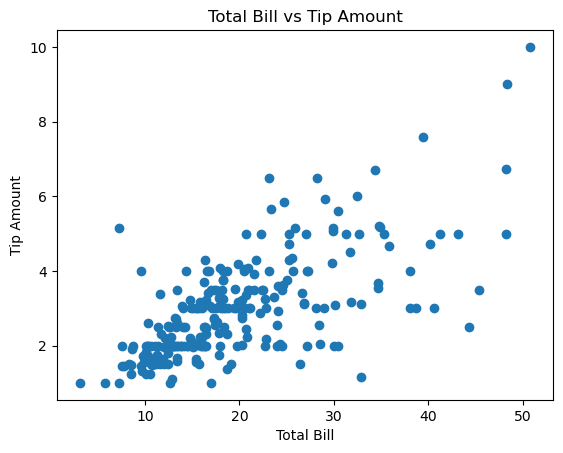

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Total Bill vs Tip Amount')
plt.show()

# OBSERVATIONS


##1.as bill amount increases tip increases


##2.relationship=straight-line(linear regression)

# FEATURE AND TARGET SEPARATION

In [ ]:
X=df[['total_bill']]#feature i/p 2-D only
y=df['tip']#feature o/p 1-D

# TRAIN TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42)


# FEATURE STANDARDIZATION

1.compare the co-efficients fairly.

2.Avoid the dominance of large values.

3.Prepare for Ridge/Lasso


In [9]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train_scaled=s.fit_transform(X_train)
x_test_scaled=s.transform(X_test)

-->fit_transform applied only on training data

-->Prevents the dat leakage

# TRAIN LINEAR REGRESSION MODEL

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m):",model.coef_)
print("Intercept(c):",model.intercept_)


Co-efficient(m): [0.93571714]
Intercept(c): 3.0877948717948724


In [11]:
y_pred=model.predict(x_test_scaled)


# MODEL EVALUATION

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)
rmse=np.sqrt(mse)
print("RMSE:",rmse)

MSE: 0.5688142529229538
R2 Score: 0.5449381659234664
RMSE: 0.7541977545199626


# VISUALIZATION

Text(0.5, 1.0, 'Total Bill vs Tip Amount')

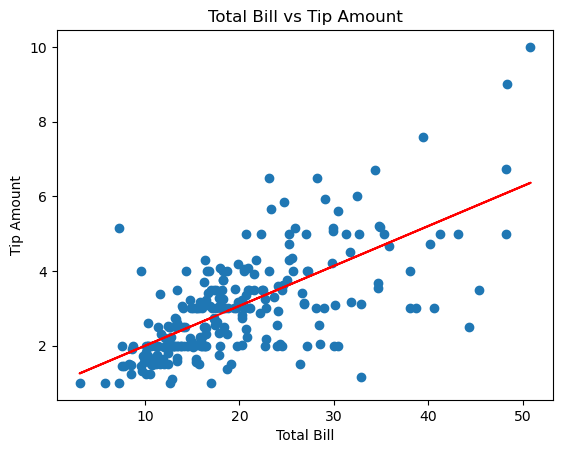

In [17]:
plt.scatter(X,y)
plt.plot(X,model.predict(s.transform(X)),color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Total Bill vs Tip Amount')


Text(0.5, 1.0, 'Total Bill vs Tip Amount')

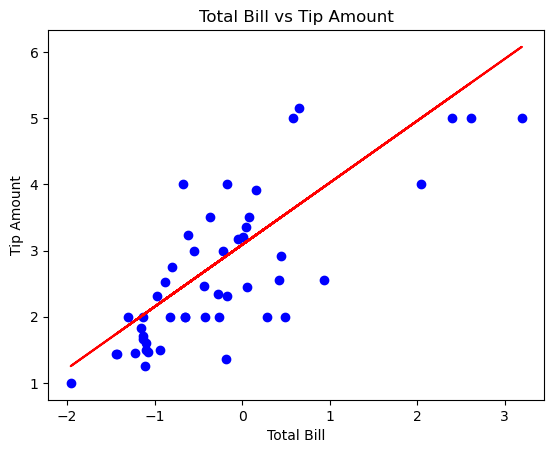

In [20]:
plt.scatter(x_test_scaled,y_test,color='blue')
plt.plot(x_test_scaled,y_pred,color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Total Bill vs Tip Amount')


# INPUT AND OUTPUT REAL-TIME

In [ ]:
bill_amount=float(input("Enter the total bill amount:"))
scaled_bill_amount=s.transform([[bill_amount]])
pred_tip=model.predict(scaled_bill_amount)
print(f"tip amount for{bill_amount} is {pred_tip[0]:.2f}")



tip amount for100.0 is 11.62


c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
